In [1]:
#!/usr/bin/env python3
# !conda install requests
# !pip install fmpsdk
# !pip install requests

import os
import typing

from dotenv import load_dotenv

import fmpsdk

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# Actual API key is stored in a .env file.  Not good to store API key directly in script.
load_dotenv()
apikey = os.environ.get("apikey")

In [3]:
# Company Valuation Methods
symbol: str = "AAPL"
symbols: typing.List[str] = ["AAPL", "GOOG","CSCO", "DKS", "HD","RY"]
exchange: str = "NYSE"
exchanges: typing.List[str] = ["NYSE", "NASDAQ"]
query: str = "AA"
limit: int = 3
period: str = "quarter"
download: bool = True
market_cap_more_than: int = 1000000000
beta_more_than: int = 1
volume_more_than: int = 10000
sector: str = "Technology"
dividend_more_than: int = 0
industry: str = "Software"
filing_type: str = "10-K"

In [4]:
df_symbols = fmpsdk.symbols_list(apikey=apikey)
df_symbols = pd.DataFrame(df_symbols)
symbols = df_symbols[df_symbols['exchangeShortName']=='NYSE']['symbol'].to_list()[:20]
symbols

['KMI',
 'GE',
 'BAC',
 'HPQ',
 'CX',
 'F',
 'SNAP',
 'WFC',
 'AIG',
 'T',
 'C',
 'VALE',
 'MS',
 'JPM',
 'ORCL',
 'NKE',
 'PG',
 'BBD',
 'PFE',
 'NOK']

In [5]:
print(f"Company Profile: {fmpsdk.company_profile(apikey=apikey, symbol=symbol)=}")

Company Profile: fmpsdk.company_profile(apikey=apikey, symbol=symbol)=[{'symbol': 'AAPL', 'price': 143.29, 'beta': 1.202797, 'volAvg': 81453715, 'mktCap': 2368612073472, 'lastDiv': 0.85, 'range': '107.32-157.26', 'changes': 1.2899933, 'companyName': 'Apple Inc.', 'currency': 'USD', 'cik': '0000320193', 'isin': 'US0378331005', 'cusip': '037833100', 'exchange': 'Nasdaq Global Select', 'exchangeShortName': 'NASDAQ', 'industry': 'Consumer Electronics', 'website': 'http://www.apple.com', 'description': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support s

In [6]:
fmpsdk.quote(apikey=apikey, symbol=symbol)

[{'symbol': 'AAPL',
  'name': 'Apple Inc.',
  'price': 143.29,
  'changesPercentage': 0.90844595,
  'change': 1.2899933,
  'dayLow': 142.73,
  'dayHigh': 144.215,
  'yearHigh': 157.26,
  'yearLow': 107.32,
  'marketCap': 2368612073472.0,
  'priceAvg50': 147.696,
  'priceAvg200': 137.5631,
  'volume': 61732656,
  'avgVolume': 81453715,
  'exchange': 'NASDAQ',
  'open': 143.06,
  'previousClose': 142.0,
  'eps': 5.108,
  'pe': 28.052074,
  'earningsAnnouncement': '2021-07-27T16:30:00.000+0000',
  'sharesOutstanding': 16530198014,
  'timestamp': 1633696123}]

In [7]:
df_income = []
for symbol in symbols:
    df_income = df_income + fmpsdk.income_statement(apikey=apikey, symbol=symbol)

df_income = pd.DataFrame(df_income)

df_income['date']= pd.to_datetime(df_income['date'])
df_income.set_index(['symbol','date'],inplace=True)
df_income.sort_values(by=['symbol','date'],inplace=True)

df_income.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period', 'revenue',
       'costOfRevenue', 'grossProfit', 'grossProfitRatio',
       'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses',
       'sellingAndMarketingExpenses',
       'sellingGeneralAndAdministrativeExpenses', 'otherExpenses',
       'operatingExpenses', 'costAndExpenses', 'interestExpense',
       'depreciationAndAmortization', 'ebitda', 'ebitdaratio',
       'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil', 'link', 'finalLink'],
      dtype='object')

In [8]:
df_balance = []
for symbol in symbols:
    df_balance = df_balance + fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol)

df_balance = pd.DataFrame(df_balance)

df_balance['date']= pd.to_datetime(df_balance['date'])
df_balance.set_index(['symbol','date'],inplace=True)
df_balance.sort_values(by=['symbol','date'],inplace=True)

df_balance.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period',
       'cashAndCashEquivalents', 'shortTermInvestments',
       'cashAndShortTermInvestments', 'netReceivables', 'inventory',
       'otherCurrentAssets', 'totalCurrentAssets', 'propertyPlantEquipmentNet',
       'goodwill', 'intangibleAssets', 'goodwillAndIntangibleAssets',
       'longTermInvestments', 'taxAssets', 'otherNonCurrentAssets',
       'totalNonCurrentAssets', 'otherAssets', 'totalAssets',
       'accountPayables', 'shortTermDebt', 'taxPayables', 'deferredRevenue',
       'otherCurrentLiabilities', 'totalCurrentLiabilities', 'longTermDebt',
       'deferredRevenueNonCurrent', 'deferredTaxLiabilitiesNonCurrent',
       'otherNonCurrentLiabilities', 'totalNonCurrentLiabilities',
       'otherLiabilities', 'totalLiabilities', 'commonStock',
       'retainedEarnings', 'accumulatedOtherComprehensiveIncomeLoss',
       'othertotalStockholdersEquity', 'totalStockholdersEquity',
       'totalLiabilitiesAndStockhol

In [9]:
df_cashflow = []
for symbol in symbols:
    df_cashflow = df_cashflow + fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol)

df_cashflow = pd.DataFrame(df_cashflow)

df_cashflow['date']= pd.to_datetime(df_cashflow['date'])
df_cashflow.set_index(['symbol','date'],inplace=True)
df_cashflow.sort_values(by=['symbol','date'],inplace=True)

df_cashflow.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period',
       'netIncome', 'depreciationAndAmortization', 'deferredIncomeTax',
       'stockBasedCompensation', 'changeInWorkingCapital',
       'accountsReceivables', 'inventory', 'accountsPayables',
       'otherWorkingCapital', 'otherNonCashItems',
       'netCashProvidedByOperatingActivities',
       'investmentsInPropertyPlantAndEquipment', 'acquisitionsNet',
       'purchasesOfInvestments', 'salesMaturitiesOfInvestments',
       'otherInvestingActivites', 'netCashUsedForInvestingActivites',
       'debtRepayment', 'commonStockIssued', 'commonStockRepurchased',
       'dividendsPaid', 'otherFinancingActivites',
       'netCashUsedProvidedByFinancingActivities',
       'effectOfForexChangesOnCash', 'netChangeInCash', 'cashAtEndOfPeriod',
       'cashAtBeginningOfPeriod', 'operatingCashFlow', 'capitalExpenditure',
       'freeCashFlow', 'link', 'finalLink'],
      dtype='object')

In [10]:
df_keymetrics = []
for symbol in symbols:
    df_keymetrics = df_keymetrics + fmpsdk.key_metrics(apikey=apikey, symbol=symbol)

df_keymetrics = pd.DataFrame(df_keymetrics)

df_keymetrics['date']= pd.to_datetime(df_keymetrics['date'])
df_keymetrics.set_index(['symbol','date'],inplace=True)
df_keymetrics.sort_values(by=['symbol','date'],inplace=True)
df_keymetrics.columns

Index(['period', 'revenuePerShare', 'netIncomePerShare',
       'operatingCashFlowPerShare', 'freeCashFlowPerShare', 'cashPerShare',
       'bookValuePerShare', 'tangibleBookValuePerShare',
       'shareholdersEquityPerShare', 'interestDebtPerShare', 'marketCap',
       'enterpriseValue', 'peRatio', 'priceToSalesRatio', 'pocfratio',
       'pfcfRatio', 'pbRatio', 'ptbRatio', 'evToSales',
       'enterpriseValueOverEBITDA', 'evToOperatingCashFlow',
       'evToFreeCashFlow', 'earningsYield', 'freeCashFlowYield',
       'debtToEquity', 'debtToAssets', 'netDebtToEBITDA', 'currentRatio',
       'interestCoverage', 'incomeQuality', 'dividendYield', 'payoutRatio',
       'salesGeneralAndAdministrativeToRevenue',
       'researchAndDdevelopementToRevenue', 'intangiblesToTotalAssets',
       'capexToOperatingCashFlow', 'capexToRevenue', 'capexToDepreciation',
       'stockBasedCompensationToRevenue', 'grahamNumber', 'roic',
       'returnOnTangibleAssets', 'grahamNetNet', 'workingCapital',
   

In [11]:
moat_columns = ["EV+Div","Earnings","Sales","Cash"]
df_moat_perShare = pd.DataFrame(index=df_balance.index,columns=moat_columns)
df_moat_perShare["Sales"]=df_income['revenue']/df_income['weightedAverageShsOutDil']
df_moat_perShare["Earnings"]=df_income['netIncome']/df_income['weightedAverageShsOutDil']
df_moat_perShare["EV+Div"]=(df_balance['totalStockholdersEquity']+df_cashflow['dividendsPaid'].fillna(0))/df_income['weightedAverageShsOutDil']
df_moat_perShare["Cash"]=(df_cashflow['operatingCashFlow'])/df_income['weightedAverageShsOutDil']
df_moat_perShare.sort_values(by=['symbol','date'],inplace=True)
df_moat_perShare

EV+Div  Earnings      Sales      Cash
symbol date                                                
AIG    2011-12-31  63.535225  9.890753  35.697961  0.019450
       2012-12-31  58.479992  2.037663  38.851923  2.178723
       2013-12-31  68.043841  6.133512  47.039347  3.959609
       2014-12-31  73.613852  5.201189  44.632543  3.458939
       2015-12-31  66.829784  1.645603  44.156276  2.155920
...                      ...       ...        ...       ...
WFC    2016-12-31  37.479984  4.294579  17.107061  0.033083
       2017-12-31  39.656788  4.421302  17.364120  3.731489
       2018-12-31  38.804563  4.628183  17.858796  7.455564
       2019-12-31  40.311610  4.417454  19.221539  1.520766
       2020-12-31  43.485559  0.798462  17.497944  0.496106

[196 rows x 4 columns]

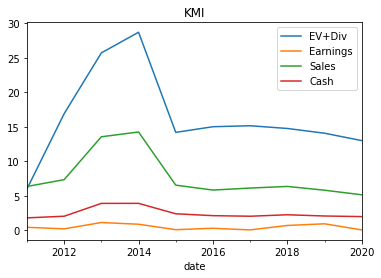

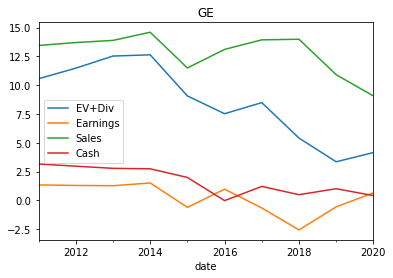

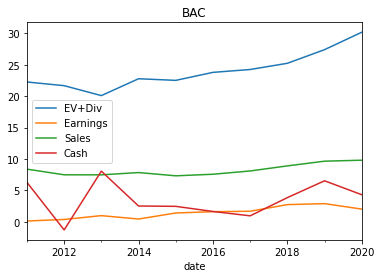

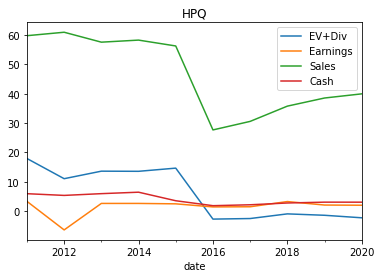

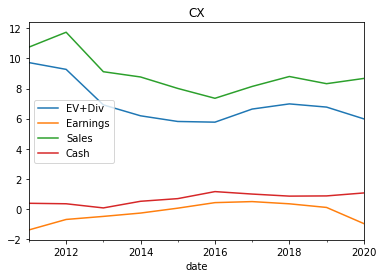

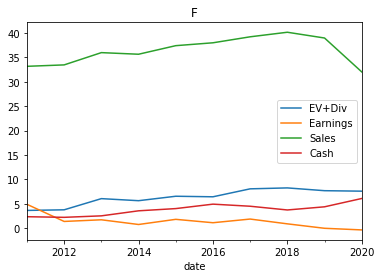

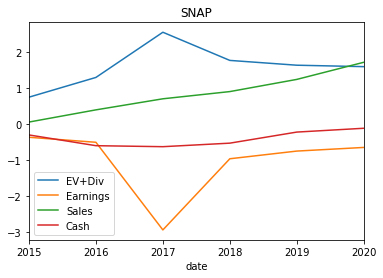

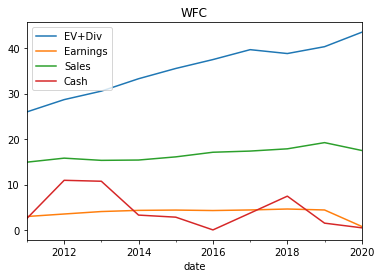

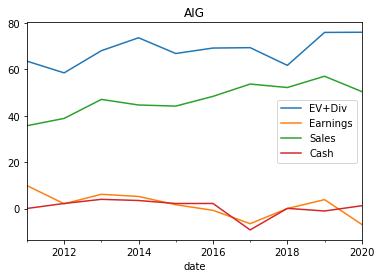

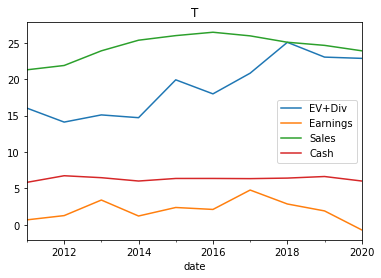

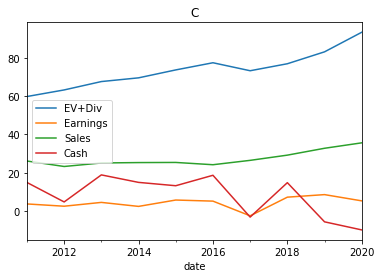

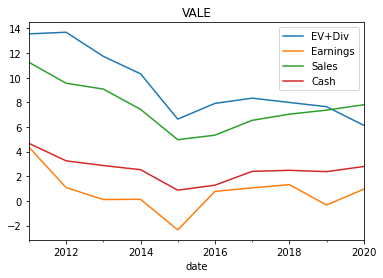

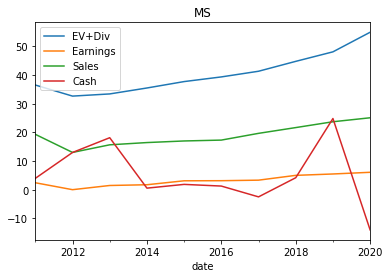

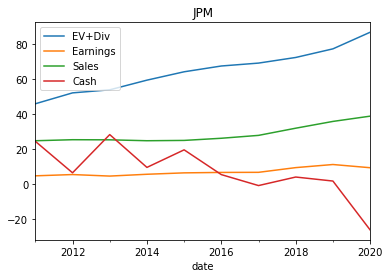

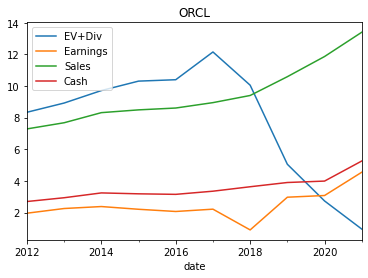

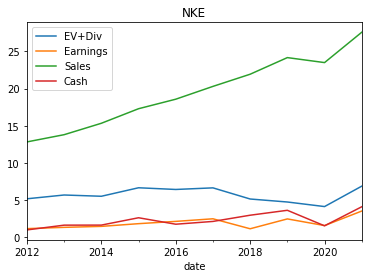

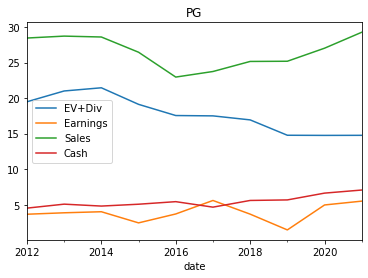

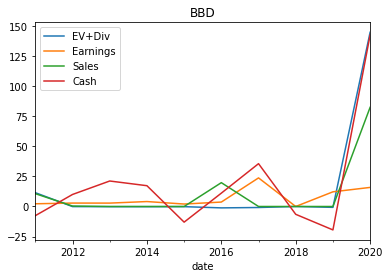

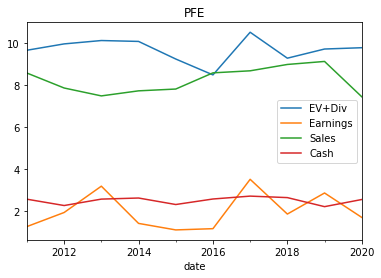

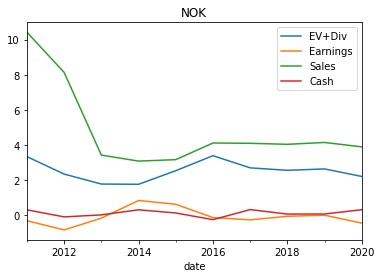

In [12]:
for symbol in symbols:
    df_moat_perShare.loc[symbol].plot(title=symbol)

In [13]:
df_moat_pct_chg = df_moat_perShare.copy()
df_moat_pct_chg = df_moat_pct_chg.groupby('symbol').pct_change()
df_moat_pct_chg

EV+Div  Earnings     Sales        Cash
symbol date                                                
AIG    2011-12-31       NaN       NaN       NaN         NaN
       2012-12-31 -0.079566 -0.793983  0.088351  111.014919
       2013-12-31  0.163541  2.010071  0.210734    0.817399
       2014-12-31  0.081859 -0.152005 -0.051166   -0.126444
       2015-12-31 -0.092157 -0.683610 -0.010671   -0.376711
...                     ...       ...       ...         ...
WFC    2016-12-31  0.055106 -0.022718  0.063194   -0.988332
       2017-12-31  0.058079  0.029508  0.015026  111.790328
       2018-12-31 -0.021490  0.046792  0.028488    0.998013
       2019-12-31  0.038837 -0.045532  0.076307   -0.796023
       2020-12-31  0.078735 -0.819248 -0.089670   -0.673779

[196 rows x 4 columns]

In [14]:
df_moat_rolling5_pct_chg = df_moat_pct_chg.groupby('symbol').rolling(5,min_periods=1).median().reset_index(0,drop=True)
df_moat_rolling5_pct_chg['Windage_Growth_Rate'] = df_moat_rolling5_pct_chg.median(axis=1)
df_moat_rolling5_pct_chg

EV+Div  Earnings     Sales        Cash  \
symbol date                                                   
AIG    2011-12-31       NaN       NaN       NaN         NaN   
       2012-12-31 -0.079566 -0.793983  0.088351  111.014919   
       2013-12-31  0.041987  0.608044  0.149543   55.916159   
       2014-12-31  0.081859 -0.152005  0.088351    0.817399   
       2015-12-31  0.001147 -0.417807  0.038840    0.345477   
...                     ...       ...       ...         ...   
WFC    2016-12-31  0.067846  0.063153  0.045188   -0.138745   
       2017-12-31  0.065051  0.029508  0.015026   -0.138745   
       2018-12-31  0.058079  0.029508  0.028488   -0.138745   
       2019-12-31  0.055106  0.014772  0.045188   -0.138745   
       2020-12-31  0.055106 -0.022718  0.028488   -0.673779   

                   Windage_Growth_Rate  
symbol date                             
AIG    2011-12-31                  NaN  
       2012-12-31             0.004393  
       2013-12-31             0.378793  
       2014-12-31             0.085105  
       2015-12-31             0.019993  
...                                ...  
WFC    2016-12-31             0.054171  
       2017-12-31             0.022267  
       2018-12-31             0.028998  
       2019-12-31             0.029980  
       2020-12-31             0.002885  

[196 rows x 5 columns]

In [15]:
mgt_columns = ("ROIC","ROE","LTD-to-FCF")
mgt_col_limits = (0.1,0.1,3)
df_mgt = pd.DataFrame(index=df_balance.index,columns=mgt_columns)
df_mgt["ROIC"]=df_keymetrics["roic"]#(df_income['operatingIncome']*(1+df_income['incomeTaxExpense']/df_income['incomeBeforeTax']))/( (df_balance['longTermDebt'] + df_balance['shortTermDebt'] + df_balance['totalStockholdersEquity']))
df_mgt["ROE"]=df_keymetrics["roe"]#df_income['netIncome']/df_balance['totalStockholdersEquity']
df_mgt["LTD-to-FCF"]=df_balance['longTermDebt']/df_cashflow['freeCashFlow']
df_mgt

ROIC       ROE   LTD-to-FCF
symbol date                                   
AIG    2011-12-31   0.0  0.155674  2150.085714
       2012-12-31   0.0  0.034844    13.193689
       2013-12-31   0.0  0.089878     7.108781
       2014-12-31   0.0  0.070186     6.234671
       2015-12-31   0.0  0.024343    10.201599
...                 ...       ...          ...
WFC    2016-12-31   0.0  0.109418  1509.289941
       2017-12-31   0.0  0.106609    12.016932
       2018-12-31   0.0  0.113632     6.348460
       2019-12-31   0.0  0.103993    33.901783
       2020-12-31   0.0  0.017755   103.813749

[196 rows x 3 columns]

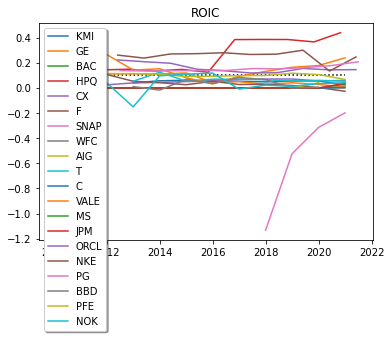

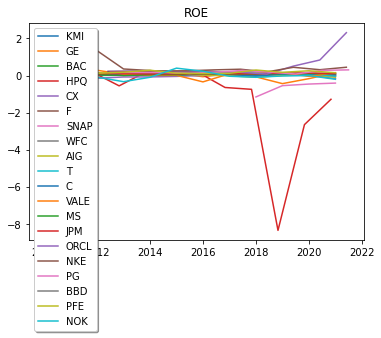

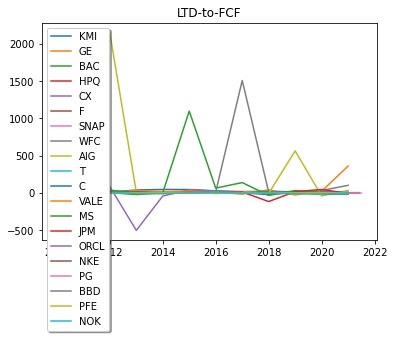

In [16]:
fig = []
ax = []

for column in mgt_columns:
  idx = mgt_columns.index(column)
  fig.append(idx)
  ax.append(idx)
  fig[idx], ax[idx] = plt.subplots()
  for symbol in symbols:
    ax[idx].plot(df_mgt.loc[symbol][column],label=symbol)
  plt.hlines(mgt_col_limits[idx], xmin=datetime.datetime(2010,1,1), xmax=datetime.datetime(2020,12,31), linestyle = 'dotted',colors='k')
  legend = ax[idx].legend(loc='best', shadow=True)
  plt.title(column)
plt.show()

In [17]:
REVENUE = 'revenue'
CHG_FIX_ASSETS_INT = 'investmentsInPropertyPlantAndEquipment'
NET_CASH_OPS = 'netCashProvidedByOperatingActivities'
SHARES_DILUTED = 'weightedAverageShsOutDil'
FCF = 'freeCashFlow'
PE = 'peRatio'
EPS = 'netIncomePerShare'

In [18]:
computed_columns = ['Sales','Sales_1y_change','PPE', 'PPE_1y_change','Cash_Ops','Shares_Diluted','PPE/Sales','PPE/Sales_10y_mean','Growth_Capex','Maint_Capex','Owner_Earnings','Owner_Earnings_per_share','10Cap'
                    ,'FCF', 'FCF_per_share','Windage_Growth_Rate','Payback_Time'
                    ,'Default_PE','PE','PE_10y_mean','EPS','EPS_10y_est','Price_10y_est','Sticker_Price','MOS30','MOS50']
target_ROR = 0.15
df_computed = pd.DataFrame(index=df_income.index,columns=computed_columns)

# for 10 Cap calculation
df_computed['Sales'] = df_income[REVENUE]
df_computed['Sales_1y_change']= df_computed.groupby('symbol')['Sales'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).reset_index(0,drop=True).to_numpy()
df_computed['PPE'] = -df_cashflow[CHG_FIX_ASSETS_INT]
df_computed['PPE_1y_change'] = df_computed.groupby('symbol')['PPE'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).reset_index(0,drop=True).to_numpy()
df_computed['Cash_Ops'] = df_cashflow[NET_CASH_OPS]
df_computed['Shares_Diluted'] = df_income[SHARES_DILUTED]
df_computed['PPE/Sales'] = df_computed['PPE']/df_computed['Sales']
df_computed['PPE/Sales_10y_mean'] = df_computed.groupby('symbol')['PPE/Sales'].rolling(10,min_periods=1).mean().reset_index(0,drop=True).to_numpy()#df.apply(df=df_computed['PPE/Sales'],func=rolling10)#df_computed['PPE/Sales'].rolling(window=10,min_periods=1).mean()
# for symbol in symbols:
# # #  df_computed.loc[ticker,'PPE/Sales_10y_mean'] = df_computed.loc[ticker]['PPE/Sales'].rolling(window=10,min_periods=1).mean()#df_computed.loc[ticker][-10:]['PPE/Sales'].mean()
#   df_computed.loc[symbol,'Windage_Growth_Rate'] = df_moat_perShare.loc[symbol,10]['EV+Div']
df_computed['Windage_Growth_Rate'] = df_moat_rolling5_pct_chg['Windage_Growth_Rate'].to_numpy()
df_computed['Growth_Capex'] = df_computed['Sales_1y_change'] * df_computed['PPE/Sales_10y_mean']
df_computed['Maint_Capex'] = df_computed['PPE'] - df_computed['Growth_Capex']
df_computed['Owner_Earnings'] = df_computed['Cash_Ops'] - df_computed['Maint_Capex']
df_computed['Owner_Earnings_per_share'] = df_computed['Owner_Earnings']/df_computed['Shares_Diluted']
df_computed['10Cap']=10*df_computed['Owner_Earnings_per_share']

# # for payback time calculation
df_computed['FCF'] = df_cashflow[FCF]
df_computed['FCF_per_share'] = df_computed['FCF']/df_computed['Shares_Diluted']
df_computed['Payback_Time'] = np.zeros(len(df_computed['Payback_Time']))
for i in range(8):
    df_computed['Payback_Time']=df_computed['Payback_Time']+df_computed['FCF_per_share']*((1+df_computed['Windage_Growth_Rate'])**i)

# # for MOS calculation
df_computed['Default_PE']=2*df_computed['Windage_Growth_Rate']*100
df_computed['PE']=df_keymetrics[PE]
df_computed['PE_10y_mean']=df_computed.groupby('symbol')['PE'].rolling(10,min_periods=1).mean().reset_index(0,drop=True).to_numpy()#sf.apply(df=df_computed['PE'],func=rolling_40)
df_computed['PE_10y_est'] = df_computed[['Default_PE','PE_10y_mean']].min(axis=1)
df_computed['EPS'] = df_keymetrics[EPS]
df_computed['EPS_10y_est'] = df_computed['EPS']*((1+df_computed['Windage_Growth_Rate'])**10)
df_computed['Price_10y_est'] = df_computed['EPS_10y_est']*df_computed['PE_10y_est']
df_computed['Sticker_Price'] = df_computed['Price_10y_est']/((1+target_ROR)**10)
df_computed['MOS50'] = df_computed['Sticker_Price']*0.5
df_computed['MOS30'] = df_computed['Sticker_Price']*0.7

df_computed[['Default_PE','PE','PE_10y_mean','PE_10y_est','EPS','EPS_10y_est','Price_10y_est','Sticker_Price','MOS30','MOS50']]
df_computed[['PPE','Growth_Capex','Maint_Capex','Windage_Growth_Rate','FCF','Payback_Time']]
# df_computed

PPE  Growth_Capex  Maint_Capex  Windage_Growth_Rate  \
symbol date                                                              
AIG    2011-12-31 -0.0           NaN          NaN                  NaN   
       2012-12-31 -0.0           0.0         -0.0             0.004393   
       2013-12-31 -0.0           0.0         -0.0             0.378793   
       2014-12-31 -0.0          -0.0          0.0             0.085105   
       2015-12-31 -0.0          -0.0          0.0             0.019993   
...                ...           ...          ...                  ...   
WFC    2016-12-31 -0.0           0.0         -0.0             0.054171   
       2017-12-31 -0.0          -0.0          0.0             0.022267   
       2018-12-31 -0.0          -0.0          0.0             0.028998   
       2019-12-31 -0.0          -0.0          0.0             0.029980   
       2020-12-31 -0.0          -0.0          0.0             0.002885   

                            FCF  Payback_Time  
symbol date                                    
AIG    2011-12-31  3.500000e+07           NaN  
       2012-12-31  3.676000e+09     17.700130  
       2013-12-31  5.865000e+09    126.081636  
       2014-12-31  5.007000e+09     37.476787  
       2015-12-31  2.877000e+09     18.503769  
...                         ...           ...  
WFC    2016-12-31  1.690000e+08      0.320669  
       2017-12-31  1.872200e+10     32.284957  
       2018-12-31  3.607300e+10     66.062120  
       2019-12-31  6.730000e+09     13.522214  
       2020-12-31  2.051000e+09      4.009157  

[196 rows x 6 columns]

In [19]:
MOS_columns = ['CurrentPrice','10Cap','Payback','MOS30','MOS50']
df_MOS = pd.DataFrame(index=symbols,columns=MOS_columns)
# ytickers = dict.fromkeys(tickers)
for symbol in symbols:
#   ytickers[ticker] = yf.Ticker(ticker)
  df_MOS.loc[symbol]['CurrentPrice'] = fmpsdk.quote(apikey=apikey, symbol=symbol)[0]['price']#ytickers[ticker].info['currentPrice']
  df_MOS.loc[symbol]['10Cap'] = df_computed.loc[symbol].iloc[-1]['10Cap']
  df_MOS.loc[symbol]['Payback'] = df_computed.loc[symbol].iloc[-1]['Payback_Time']
  df_MOS.loc[symbol]['MOS30'] = df_computed.loc[symbol].iloc[-1]['MOS30']
  df_MOS.loc[symbol]['MOS50'] = df_computed.loc[symbol].iloc[-1]['MOS50']

df_MOS['Buy'] = np.where((df_MOS['CurrentPrice']<df_MOS['MOS30'])|(df_MOS['CurrentPrice']<df_MOS['10Cap'])|(df_MOS['CurrentPrice']<df_MOS['Payback']),True, False)

df_MOS

,CurrentPrice,10Cap,Payback,MOS30,MOS50,Buy
KMI,16.94,24.889854,17.672493,-0.065837,-0.047027,True
GE,105.51,-0.904573,0.056512,-0.069175,-0.04941,False
BAC,44.12,43.247581,42.26345,6.939414,4.956724,False
HPQ,28.05,26.048717,22.943872,2.108373,1.505981,False
CX,6.65,6.747976,5.358933,-0.154116,-0.110083,True
F,14.89,61.084823,37.508755,-0.017531,-0.012522,True
SNAP,76.28,-0.868793,-0.944659,1.443679,1.031199,False
WFC,47.76,4.961057,4.009157,0.082379,0.058842,False
AIG,57.2,11.940512,1.624043,0.001287,0.00092,False
T,27.09,37.460435,29.20369,0.28889,0.20635,True


In [98]:
df_Historical_sp500_constituent = fmpsdk.historical_sp500_constituent(apikey=apikey)


df_Historical_sp500_constituent = pd.DataFrame(df_Historical_sp500_constituent)

df_Historical_sp500_constituent['date']= pd.to_datetime(df_Historical_sp500_constituent['date'])
# df_Historical_sp500_constituent.set_index(['symbol','date'],inplace=True)
df_Historical_sp500_constituent.sort_values(by=['date','symbol'],inplace=True)

# len(df_Historical_sp500_constituent['addedSecurity']=='')
# df_Historical_sp500_constituent
df_sp500=df_Historical_sp500_constituent.copy()#.drop(columns=['dateAdded','reason','removedSecurity'])
df_sp500['Added'] = (df_sp500['addedSecurity']!='')
df_sp500['Removed'] = (df_sp500['removedTicker']!='')
df_sp500=df_sp500[['date','symbol','Added','Removed']]
df_sp500

,date,symbol,Added,Removed
544,1999-12-07,LDW,False,True
545,1999-12-07,YHOO,True,False
543,2000-07-27,JDSU,True,False
542,2000-07-27,RAD,False,True
541,2000-12-05,ABK,True,False
...,...,...,...,...
3,2021-09-20,CDAY,True,False
1,2021-09-20,MTCH,True,False
4,2021-09-20,NOV,False,True
0,2021-09-20,PRGO,False,True


In [106]:
df_sp500_constituent = fmpsdk.sp500_constituent(apikey=apikey)


df_sp500_constituent = pd.DataFrame(df_sp500_constituent)

# df_sp500_constituent['date']= pd.to_datetime(df_sp500_constituent['date'])
# df_sp500_constituent.set_index(['symbol','date'],inplace=True)
# df_sp500_constituent.sort_values(by=['date','symbol'],inplace=True)
df_sp500a = df_sp500_constituent.copy()
df_sp500a['date'] = pd.to_datetime(df_sp500a['dateFirstAdded'].astype(str).str[0:10])
df_sp500a

,symbol,name,sector,subSector,headQuarter,dateFirstAdded,cik,founded,date
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,0000066740,1902,1976-08-09
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888,1964-03-31
2,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888),2012-12-31
3,ABMD,Abiomed,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981,2018-05-31
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989,2011-07-06
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,0001041061,1997,1997-10-06
501,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,0000877212,1969,2019-12-23
502,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,0001136869,1927,2001-08-07
503,ZION,Zions Bancorp,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,0000109380,1873,2001-06-22


In [21]:

print(f"Multiple Company Quotes: {fmpsdk.quote(apikey=apikey, symbol=symbols)=}")
print(f"Key Executives: {fmpsdk.key_executives(apikey=apikey, symbol=symbol)=}")
print(f"Search: {fmpsdk.search(apikey=apikey, query=query, exchange=exchange, limit=limit)=}")
print(f"Ticker Search: {fmpsdk.search_ticker(apikey=apikey, query=query, exchange=exchange, limit=limit)=}")
fmpsdk.financial_statement(apikey=apikey, symbol=symbol)
print(f"Annual Income Statement: {fmpsdk.income_statement(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Income Statement: {fmpsdk.income_statement(apikey=apikey, symbol=symbol, period='quarter')=}")
fmpsdk.income_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Balance Sheet Statement: {fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Balance Sheet Statement: {fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Cash Flow Statement: {fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, )=}")
print(f"Quarterly Cash Flow Statement: {fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Financial Statement Symbols List: {fmpsdk.financial_statement_symbol_lists(apikey=apikey)=}")
print(f"Income Statement Growth: {fmpsdk.income_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Balance Sheet Statement Growth: {fmpsdk.balance_sheet_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Cash Flow Statement Growth: {fmpsdk.cash_flow_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Annual Income Statement as Reported : {fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Income Statement as Reported: {fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Balance Sheet Statement as Reported : {fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Balance Sheet Statement as Reported: {fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Cash Flow Statement as Reported : {fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Cash Flow Statement as Reported: {fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Full Financial Statement as Reported : {fmpsdk.financial_statement_full_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Full Financial Statement as Reported: {fmpsdk.financial_statement_full_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Financial Ratios (TTM): {fmpsdk.financial_ratios_ttm(apikey=apikey, symbol=symbol)=}")
print(f"Annual Financial Ratios: {fmpsdk.financial_ratios(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Financial Ratios: {fmpsdk.financial_ratios(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Annual Enterprise Values: {fmpsdk.enterprise_values(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Enterprise Values: {fmpsdk.enterprise_values(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Key Metrics (TTM): {fmpsdk.key_metrics_ttm(apikey=apikey, symbol=symbol)=}")
print(f"Annual Key Metrics: {fmpsdk.key_metrics(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Key Metrics: {fmpsdk.key_metrics(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Annual Financial Growth: {fmpsdk.financial_growth(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Financial Growth: {fmpsdk.financial_growth(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Company Rating: {fmpsdk.rating(apikey=apikey, symbol=symbol)=}")
print(f"Historical Company Rating: {fmpsdk.historical_rating(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Discounted Cash Flow: {fmpsdk.discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Annual Historical Discounted Cash Flow: {fmpsdk.historical_discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Historical Discounted Cash Flow: {fmpsdk.historical_discounted_cash_flow(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Daily Historical Discounted Cash Flow: {fmpsdk.historical_daily_discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Market Capitalization: {fmpsdk.market_capitalization(apikey=apikey, symbol=symbol)=}")
print(f"Historical Market Capitalization: {fmpsdk.historical_market_capitalization(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Symbols List: {fmpsdk.symbols_list(apikey=apikey)=}")
print(f"Stock Screener (Sector Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, sector=sector, exchange=exchange, dividend_more_than=dividend_more_than, limit=limit)=}")
print(f"Stock Screener (Industry Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, sector=sector, industry=industry, exchange=exchange, dividend_more_than=dividend_more_than, limit=limit)=}")
print(f"Stock Screener (Multiple Exchanges Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, exchange=exchanges)=}")
print(f"Delisted Companies: {fmpsdk.delisted_companies(apikey=apikey, limit=limit)=}")
print(f"Stock News (Single): {fmpsdk.stock_news(apikey=apikey, tickers=symbol)=}")
print(f"Stock News (Multiple): {fmpsdk.stock_news(apikey=apikey, tickers=symbols)=}")
print(f"Stock News (Latest): {fmpsdk.stock_news(apikey=apikey, limit=limit)=}")
print(f"Earnings Surprises: {fmpsdk.earnings_surprises(apikey=apikey, symbol=symbol)=}")
print(f"SEC Filings: {fmpsdk.sec_filings(apikey=apikey, symbol=symbol, filing_type=filing_type)=}")
print(f"Press Releases: {fmpsdk.press_releases(apikey=apikey, symbol=symbol)=}")


Multiple Company Quotes: fmpsdk.quote(apikey=apikey, symbol=symbols)={'Error Message': 'Special Endpoint : this endpoint is only for premium members please visit our subscription page to upgrade your plan at https://financialmodelingprep.com/developer/docs/pricing'}
Key Executives: fmpsdk.key_executives(apikey=apikey, symbol=symbol)={'Error Message': 'Special Endpoint : this endpoint is only for premium members please visit our subscription page to upgrade your plan at https://financialmodelingprep.com/developer/docs/pricing'}
Search: fmpsdk.search(apikey=apikey, query=query, exchange=exchange, limit=limit)=[{'symbol': 'AA', 'name': 'Alcoa Corporation', 'currency': 'USD', 'stockExchange': 'New York Stock Exchange', 'exchangeShortName': 'NYSE'}, {'symbol': 'AIR', 'name': 'AAR Corp.', 'currency': 'USD', 'stockExchange': 'New York Stock Exchange', 'exchangeShortName': 'NYSE'}, {'symbol': 'MAX', 'name': 'MediaAlpha, Inc.', 'currency': 'USD', 'stockExchange': 'New York Stock Exchange', 'exc

Quarterly Balance Sheet Statement: fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol, period=period)={'Error Message': 'Special Endpoint : this endpoint is only for premium members please visit our subscription page to upgrade your plan at https://financialmodelingprep.com/developer/docs/pricing'}
Annual Cash Flow Statement: fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, )=[{'date': '2020-10-31', 'symbol': 'RY', 'reportedCurrency': 'CAD', 'fillingDate': '2020-12-15', 'acceptedDate': '2020-12-15 11:13:52', 'period': 'FY', 'netIncome': 11432000000, 'depreciationAndAmortization': 2648000000, 'deferredIncomeTax': -586000000, 'stockBasedCompensation': 0.0, 'changeInWorkingCapital': 121252000000, 'accountsReceivables': 0.0, 'inventory': 0.0, 'accountsPayables': 0.0, 'otherWorkingCapital': 125300000000, 'otherNonCashItems': 0.0, 'netCashProvidedByOperatingActivities': 138819000000, 'investmentsInPropertyPlantAndEquipment': -2629000000, 'acquisitionsNet': 0.0, 'purchasesOfI

Income Statement Growth: fmpsdk.income_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=[{'date': '2020-10-31', 'symbol': 'RY', 'period': 'FY', 'growthRevenue': 0.025649958629098985, 'growthCostOfRevenue': 0, 'growthGrossProfit': 0, 'growthGrossProfitRatio': 0, 'growthResearchAndDevelopmentExpenses': 0, 'growthGeneralAndAdministrativeExpenses': -0.04247787610619469, 'growthSellingAndMarketingExpenses': 0, 'growthOtherExpenses': 0, 'growthOperatingExpenses': -1, 'growthCostAndExpenses': 0, 'growthInterestExpense': -0.3491475166790215, 'growthDepreciationAndAmortization': 0.06349206349206349, 'growthEBITDA': -0.2321114672732913, 'growthEBITDARatio': -0.25131520138402585, 'growthOperatingIncome': 0, 'growthOperatingIncomeRatio': 0, 'growthTotalOtherIncomeExpensesNet': 0, 'growthIncomeBeforeTax': -0.09582757320598215, 'growthIncomeBeforeTaxRatio': -0.11843956197048994, 'growthIncomeTaxExpense': -0.029904699309891553, 'growthNetIncome': -0.11104199066874028, 'growthNetIncomeRatio

Cash Flow Statement Growth: fmpsdk.cash_flow_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=[{'date': '2020-10-31', 'symbol': 'RY', 'period': 'FY', 'growthNetIncome': -0.11104199066874028, 'growthDepreciationAndAmortization': 0.36918304033092036, 'growthDeferredIncomeTax': 0.12909441233140656, 'growthStockBasedCompensation': 0.0, 'growthChangeInWorkingCapital': -85.20277777777778, 'growthAccountsReceivables': 0.0, 'growthInventory': 0.0, 'growthAccountsPayables': 0.0, 'growthOtherWorkingCapital': 2.7050178893521393, 'growthOtherNonCashItems': 0.0, 'growthNetCashProvidedByOperatingActivites': 8.731440588853838, 'growthInvestmentsInPropertyPlantAndEquipment': 0.16275984077841663, 'growthAcquisitionsNet': 0.0, 'growthPurchasesOfInvestments': 1.0641402636846828, 'growthSalesMaturitiesOfInvestments': 0.7328112333083501, 'growthOtherInvestingActivites': -0.6137244050913115, 'growthNetCashUsedForInvestingActivites': 2.555365809814848, 'growthDebtRepayment': 2.2618181818181817, 'g

Annual Financial Ratios: fmpsdk.financial_ratios(apikey=apikey, symbol=symbol)=[{'symbol': 'RY', 'date': '2020-10-31', 'period': 'FY', 'currentRatio': None, 'quickRatio': None, 'cashRatio': None, 'daysOfSalesOutstanding': 144.3603515625, 'daysOfInventoryOutstanding': None, 'operatingCycle': None, 'daysOfPayablesOutstanding': None, 'cashConversionCycle': None, 'grossProfitMargin': 0.0, 'operatingProfitMargin': 0.0, 'pretaxProfitMargin': 0.305472995923913, 'netProfitMargin': 0.24269701086956522, 'effectiveTaxRate': 0.20515671693654874, 'returnOnAssets': 0.0070370343012333275, 'returnOnEquity': 0.13175516037203083, 'returnOnCapitalEmployed': None, 'netIncomePerEBT': 0.7944957953992633, 'ebtPerEbit': None, 'ebitPerRevenue': 0.0, 'debtRatio': 0.9465900668986081, 'debtEquityRatio': 17.72310901610059, 'longTermDebtToCapitalization': 0.10210691888983174, 'totalDebtToCapitalization': None, 'interestCoverage': 0.0, 'cashFlowToDebtRatio': 14.069017938583157, 'companyEquityMultiplier': 18.72310901

Quarterly Financial Ratios: fmpsdk.financial_ratios(apikey=apikey, symbol=symbol, period=period)={'Error Message': 'Special Endpoint : this endpoint is only for premium members please visit our subscription page to upgrade your plan at https://financialmodelingprep.com/developer/docs/pricing'}
Annual Enterprise Values: fmpsdk.enterprise_values(apikey=apikey, symbol=symbol)=[{'symbol': 'RY', 'date': '2020-10-31', 'stockPrice': 81.980003, 'numberOfShares': 1423915000, 'marketCapitalization': 116732555971.745, 'minusCashAndCashEquivalents': 160272000000, 'addTotalDebt': 9867000000, 'enterpriseValue': -33672444028.255005}, {'symbol': 'RY', 'date': '2019-10-31', 'stockPrice': 81.75, 'numberOfShares': 1434779000, 'marketCapitalization': 117293183250, 'minusCashAndCashEquivalents': 64655000000, 'addTotalDebt': 9815000000, 'enterpriseValue': 62453183250}, {'symbol': 'RY', 'date': '2018-10-31', 'stockPrice': 73.260002, 'numberOfShares': 1443894000, 'marketCapitalization': 105779677327.788, 'min

Quarterly Key Metrics: fmpsdk.key_metrics(apikey=apikey, symbol=symbol, period=period)={'Error Message': 'Special Endpoint : this endpoint is only for premium members please visit our subscription page to upgrade your plan at https://financialmodelingprep.com/developer/docs/pricing'}
Annual Financial Growth: fmpsdk.financial_growth(apikey=apikey, symbol=symbol)=[{'symbol': 'RY', 'date': '2020-10-31', 'period': 'FY', 'revenueGrowth': 0.025649958629098985, 'grossProfitGrowth': 0.0, 'ebitgrowth': 0.0, 'operatingIncomeGrowth': 0.0, 'netIncomeGrowth': -0.11104199066874028, 'epsgrowth': -0.10706150341685644, 'epsdilutedGrowth': -0.10628571428571425, 'weightedAverageSharesGrowth': -0.0075718978323490935, 'weightedAverageSharesDilutedGrowth': -0.008268306260507176, 'dividendsperShareGrowth': 0.059140032063140585, 'operatingCashFlowGrowth': 8.731440588853838, 'freeCashFlowGrowth': 10.345384871709431, 'tenYRevenueGrowthPerShare': 0.6589577945054936, 'fiveYRevenueGrowthPerShare': 0.35713617400924

Quarterly Financial Growth: fmpsdk.financial_growth(apikey=apikey, symbol=symbol, period=period)={'Error Message': 'Special Endpoint : this endpoint is only for premium members please visit our subscription page to upgrade your plan at https://financialmodelingprep.com/developer/docs/pricing'}
Company Rating: fmpsdk.rating(apikey=apikey, symbol=symbol)=[{'symbol': 'RY', 'date': '2021-10-05', 'rating': 'S-', 'ratingScore': 5, 'ratingRecommendation': 'Strong Buy', 'ratingDetailsDCFScore': 5, 'ratingDetailsDCFRecommendation': 'Strong Buy', 'ratingDetailsROEScore': 3, 'ratingDetailsROERecommendation': 'Neutral', 'ratingDetailsROAScore': 3, 'ratingDetailsROARecommendation': 'Neutral', 'ratingDetailsDEScore': 5, 'ratingDetailsDERecommendation': 'Strong Buy', 'ratingDetailsPEScore': 5, 'ratingDetailsPERecommendation': 'Strong Buy', 'ratingDetailsPBScore': 5, 'ratingDetailsPBRecommendation': 'Strong Buy'}]
Historical Company Rating: fmpsdk.historical_rating(apikey=apikey, symbol=symbol, limit=

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

ERROR:root:Invalid industry value: Software.  Valid options: ['Entertainment', 'Oil & Gas Midstream', 'Semiconductors', 'Specialty Industrial Machinery', 'Banks Diversified', 'Consumer Electronics', 'Software Infrastructure', 'Broadcasting', 'Computer Hardware', 'Building Materials', 'Resorts & Casinos', 'Auto Manufacturers', 'Internet Content & Information', 'Insurance Diversified', 'Telecom Services', 'Metals & Mining', 'Capital Markets', 'Steel', 'Footwear & Accessories', 'Household & Personal Products', 'Other Industrial Metals & Mining', 'Oil & Gas E&P', 'Banks Regional', 'Drug Manufacturers General', 'Internet Retail', 'Communication Equipment', 'Semiconduct

Stock Screener (Sector Example): fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, sector=sector, exchange=exchange, dividend_more_than=dividend_more_than, limit=limit)=[{'symbol': 'TSM', 'companyName': 'Taiwan Semiconductor Manufacturing Company Limited', 'marketCap': 624663265280, 'sector': 'Technology', 'industry': 'Semiconductors', 'beta': 1.010577, 'price': 109.34, 'lastAnnualDividend': 1.725109, 'volume': 7950981, 'exchange': 'New York Stock Exchange', 'exchangeShortName': 'NYSE', 'country': 'TW', 'isEtf': False, 'isActivelyTrading': True}, {'symbol': 'CRM', 'companyName': 'salesforce.com, inc.', 'marketCap': 252288319488, 'sector': 'Technology', 'industry': 'Software—Application', 'beta': 1.040211, 'price': 275.27, 'lastAnnualDividend': 0, 'volume': 6168983, 'exchange': 'New York Stock Exchange', 'exchangeShortName': 'NYSE', 'country': 'US', 'isEtf': False, 'isActivelyTrading': True},

SEC Filings: fmpsdk.sec_filings(apikey=apikey, symbol=symbol, filing_type=filing_type)=[]
Press Releases: fmpsdk.press_releases(apikey=apikey, symbol=symbol)={'Error Message': 'Special Endpoint : this endpoint is only for premium members please visit our subscription page to upgrade your plan at https://financialmodelingprep.com/developer/docs/pricing'}
